In [26]:
import pandas as pd
from src.models.NaiveBayesClassifier import NaiveBayesClassifier
from scipy.stats import randint as sp_randint
from sklearn.preprocessing import LabelEncoder

In [27]:
NaiveBayes = NaiveBayesClassifier()
#load train and test split
X_train = pd.read_csv('../data/processed/without_outliers/train_under.csv')
y_train = X_train['class']
X_train = X_train.drop(['class'], axis=1)
X_test = pd.read_csv('../data/processed/without_outliers/test.csv')
y_test = X_test['class']
X_test = X_test.drop(['class'], axis=1)
#encode labels
label_encoder = LabelEncoder().fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

In [28]:
clf = NaiveBayesClassifier()

clf.hyperparameter_tuning(X_train,y_train)

We will test wich bayes classifier is better: GaussianNB, MultinomialNB, ComplementNB, BernouilliNB and CategoricalNB 

The best model is Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('pca_step',
                                                  PCA(n_components=5),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2fb78aabe0>),
                                                 ('redshift_step',
                                                  FunctionTransformer(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2fb79b4850>)])),
                ('scaler', MinMaxScaler()), ('model', GaussianNB())]) with a score of 0.9441173616252788 



Inference time : 1.9601732492446898e-06 seconds
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     11605
           1       0.82      0.91      0.86      3719
           2       0.98      0.99      0.99      3876

    accuracy                           0.94     19200
   macro avg       0.92      0.94      0.93     19200
weighted avg       0.94      0.94      0.94     19200

auc score for class 0:  0.9829374469416403
auc score for class 1:  0.9807516049086114
auc score for class 2:  0.9969834916340247


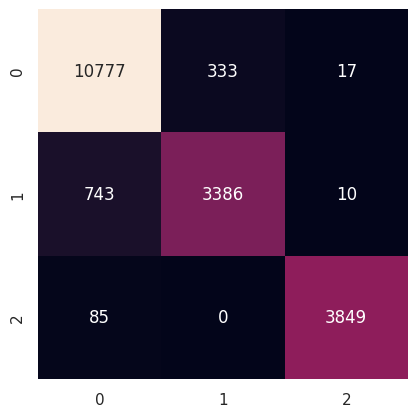

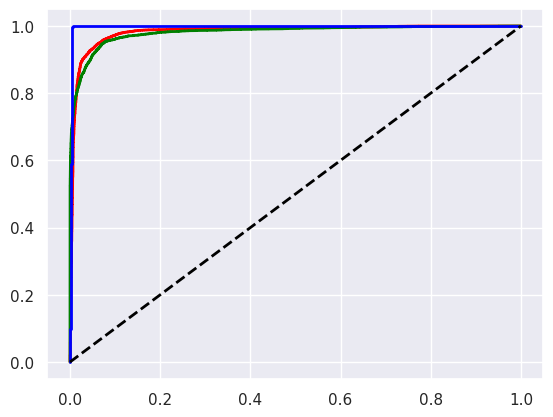

In [29]:
clf.evaluate(X_test, y_test)

In [30]:
path = '../models/NB/'
name = 'NaiveBayes_without_outliers_undersampled'
clf.save(new_name=name, path=path)